# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [3]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [4]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [6]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

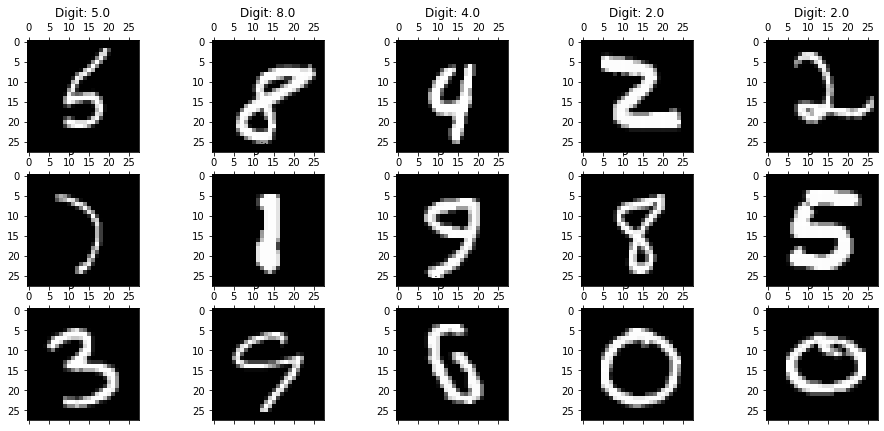

In [7]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56000, 784), (14000, 784), (56000, 1), (14000, 1))

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

In [10]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_train)
X_pca 

array([[-5.77204739e+02,  1.65567715e+01,  4.07606201e+02, ...,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.69473894e+02,  6.12545244e+02, -3.56167264e+02, ...,
         2.13775313e-13, -3.14646226e-13,  1.34249604e-13],
       [-6.86730026e+02, -6.65122764e+01, -2.16282798e+02, ...,
        -3.71774141e-13,  1.30573784e-14, -9.22547562e-14],
       ...,
       [-1.18449673e+02,  5.25810755e+02, -4.12119320e+02, ...,
         1.56485770e-16, -1.20393074e-15,  1.07897696e-15],
       [ 1.72269740e+03, -6.12935358e+02,  5.78198893e+02, ...,
         1.37202801e-15, -6.90660850e-15,  4.66770119e-16],
       [ 6.84332184e+01, -6.95630807e+01, -1.94701552e+02, ...,
        -1.74055061e-17, -3.64040579e-15, -3.11829969e-16]])

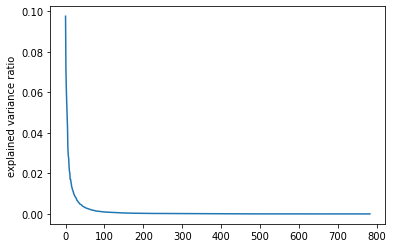

In [11]:
plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.ylabel('explained variance ratio')
plt.show()

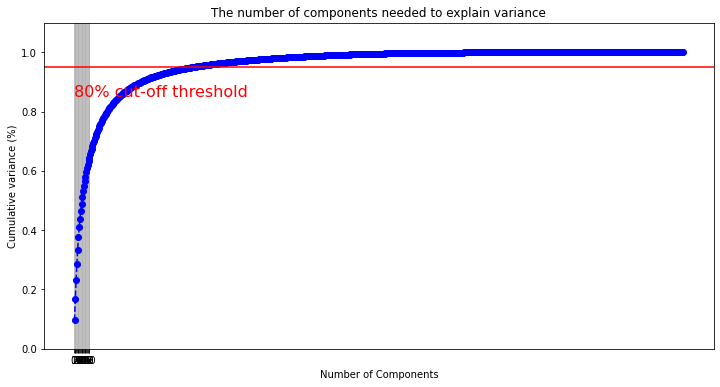

In [36]:
pca = PCA().fit(X_train)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 785, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 21, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '80% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()


In [35]:
y1 = pd.DataFrame(y)
y1 = y1[y1 <= 0.80]

y1.isna().sum()

0    742
dtype: int64

In [12]:
from kneed import KneeLocator
kn = KneeLocator(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, curve = 'convex', direction = 'decreasing')  
kn.knee # 784 -> 49

Elbow Point: 49


In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_train, np.ravel(y_train))

In [14]:
lda.explained_variance_ratio_

array([0.23708117, 0.20328823, 0.17798282, 0.10633489, 0.09415639,
       0.06896763, 0.04990535, 0.03507761, 0.02720591])

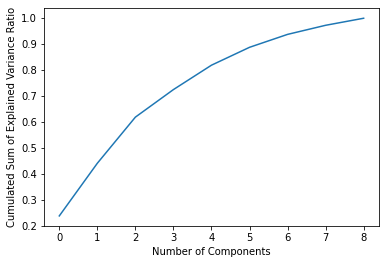

[0.23708117 0.4403694  0.61835223 0.72468711 0.8188435  0.88781114
 0.93771649 0.97279409 1.        ]


In [15]:
# 누적 설명 비율 그래프     
plt.plot(range(len(np.cumsum(lda.explained_variance_ratio_))), np.cumsum(lda.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulated Sum of Explained Variance Ratio")
plt.show()
print(np.cumsum(lda.explained_variance_ratio_))

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

In [16]:
# RandomForest Classifier - 원본 데이터
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.metrics import accuracy_score

start = time.time()
RFC = RandomForestClassifier(random_state=1203)
RFC.fit(X_train, y_train)
accuracy = accuracy_score(y_test, RFC.predict(X_test))
end = time.time()

print(f"걸린 시간: {end - start}")
print(f"정확도: {accuracy}")

C:\Users\ms964\AppData\Local\Temp\ipykernel_1072\1947029617.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC.fit(X_train, y_train)


걸린 시간: 37.936747789382935
정확도: 0.9695714285714285


In [17]:
# RandomForest Classifier - PCA
pca = PCA(n_components = 49)
pca_X_Train = pca.fit_transform(X_train)
pca_X_Test = pca.fit_transform(X_test)

start = time.time()
RFC = RandomForestClassifier(random_state=1203)
RFC.fit(pca_X_Train, y_train)
accuracy = accuracy_score(y_test, RFC.predict(pca_X_Test))
end = time.time()

print(f"걸린 시간: {end - start}")
print(f"정확도: {accuracy}")

C:\Users\ms964\AppData\Local\Temp\ipykernel_1072\1184193009.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC.fit(pca_X_Train, y_train)


걸린 시간: 55.39159035682678
정확도: 0.2980714285714286


In [18]:
# RandomForest Classifier - LDA
lda = LinearDiscriminantAnalysis(n_components = 7)
lda_X_train = lda.fit_transform(X_train, np.ravel(y_train))
lda_X_test = lda.transform(X_test) 

start = time.time()
RFC = RandomForestClassifier(random_state=1203)
RFC.fit(lda_X_train, y_train)
accuracy = accuracy_score(y_test, RFC.predict(lda_X_test))
end = time.time()

print(f"걸린 시간: {end - start}")
print(f"정확도: {accuracy}")

C:\Users\ms964\AppData\Local\Temp\ipykernel_1072\2078418054.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC.fit(lda_X_train, y_train)


걸린 시간: 16.4231858253479
정확도: 0.8956428571428572


In [20]:
# LogisticRegression - 원본 데이터
from sklearn.linear_model import LogisticRegression

start = time.time()
LR = LogisticRegression(max_iter=1000, random_state=1203)
LR.fit(X_train, y_train)
accuracy = accuracy_score(y_test, LR.predict(X_test))
end = time.time()

print(f"걸린 시간: {end - start}")
print(f"정확도: {accuracy}")

c:\Users\ms964\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


걸린 시간: 109.7150571346283
정확도: 0.9163571428571429


c:\Users\ms964\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


특정한 틀 없이 자유롭게 해주시면 됩니다!

In [21]:
# LogisticRegression - PCA
pca = PCA(n_components = 49)
pca_X_Train = pca.fit_transform(X_train)
pca_X_Test = pca.fit_transform(X_test)

start = time.time()
LR = LogisticRegression(max_iter=1000, random_state=1203)
LR.fit(pca_X_Train, y_train)
accuracy = accuracy_score(y_test, LR.predict(pca_X_Test))
end = time.time()

print(f"걸린 시간: {end - start}")
print(f"정확도: {accuracy}")

c:\Users\ms964\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


걸린 시간: 30.596256017684937
정확도: 0.29078571428571426


c:\Users\ms964\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
# LogisticRegression - LDA
lda = LinearDiscriminantAnalysis(n_components = 7)
lda_X_train = lda.fit_transform(X_train, np.ravel(y_train))
lda_X_test = lda.transform(X_test) 

start = time.time()
LR = LogisticRegression(max_iter=1000, random_state=1203)
LR.fit(lda_X_train, y_train)
accuracy = accuracy_score(y_test, LR.predict(lda_X_test))
end = time.time()

print(f"걸린 시간: {end - start}")
print(f"정확도: {accuracy}")

c:\Users\ms964\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


걸린 시간: 1.065114974975586
정확도: 0.87


RandomForestClassifier와 LogisticRegression을 사용하여 분류를 진행하였다.<br>
분명한것은 원본 데이터의 정확도가 가장 높게 나왔지만 소요 시간이 많은 것으로 나타났다.<br>
한 가지 의문인 점은 pca를 진행하여 실행한 결과가 정확도가 매우 낮은데, 이유를 잘 모르겠다.